## Imports

Rheology package must be installed on local computer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rheology as rh

## Load Data
Load raw data into a pandas dataframe for each sample (n). Make sure all columns in the csv has cell **type "Number" with no , separating 1000.** Also ensure to **delete the notes at the top of the csv with the parameters being the first row** (Meas. Pts., Time, Storage Modulus, etc.).

In [3]:
# PXP 37C data
p1 = pd.read_csv('exampledata/PXP_N1.csv', encoding="ISO-8859-1")
p2 = pd.read_csv('exampledata/PXP_N2.csv', encoding="ISO-8859-1")
p3 = pd.read_csv('exampledata/PXP_N3.csv', encoding="ISO-8859-1")
p4 = pd.read_csv('exampledata/PXP_N4.csv', encoding="ISO-8859-1")

# TXT 37C data
t1 = pd.read_csv('exampledata/TXT_N1.csv', encoding="ISO-8859-1")
t2 = pd.read_csv('exampledata/TXT_N2.csv', encoding="ISO-8859-1")
t3 = pd.read_csv('exampledata/TXT_N3.csv', encoding="ISO-8859-1")
t4 = pd.read_csv('exampledata/TXT_N4.csv', encoding="ISO-8859-1")

Parse the data for each n into separate tests using `rh.all_tests_n(df)`. This will return a dictionary where each entry corresponds to a separate test in the rheology protocol. See below for the dictionary keys.

0 : time sweep \
1 : frequency sweep \
2 : time sweep \
3 : strain sweep \
4 : time sweep \
5 : cyclic strain sweep \
6 : shear thinning test

To calculate an average of all n's in a group, use `rh.all_tests_avg(df)` for returning a dictionary where each entry corresponds to a separate test in the rheology protocol (same keys as above).

In [4]:
pxp = rh.all_tests(p1, p2, p3, p4)
txt = rh.all_tests(t1, t2, t3, t4)

pxp_37c_avg = rh.all_tests_avg(pxp)
txt_37c_avg = rh.all_tests_avg(txt)

## Graph: Time Sweeps

In [5]:
x = 'Time'
y1 = 'Storage Modulus'
y2 = 'Loss Modulus'
ylabel = 'Modulus [Pa]'
xlabel = 'Time [s]'
xscale = 'Linear'

y1legend_df1 = "G' PXP"
y2legend_df1 = 'G" PXP'

y1legend_df2 = "G' T40A"
y2legend_df2 = 'G" T40A'

title_0 = 'Time Sweep, 30rad/s, 5% Strain, 10wt%, 37C'
title_2 = 'Time Sweep, 30rad/s, 5% Strain, 10wt%, 37C'
title_4 = 'Time Sweep, 30rad/s, 5% Strain, 10wt%, 37C'

titles = [title_0, title_2, title_4]
intervals = [0, 2, 4]
sizes = [50, 50, 50]
l = 1

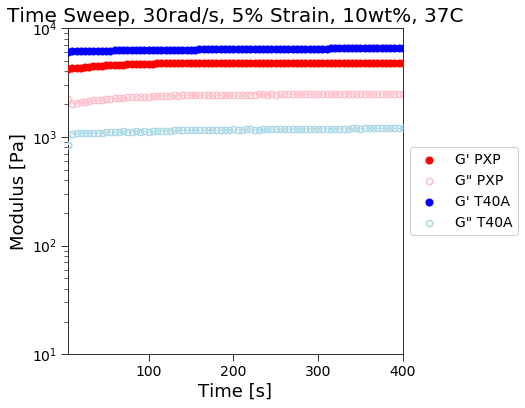

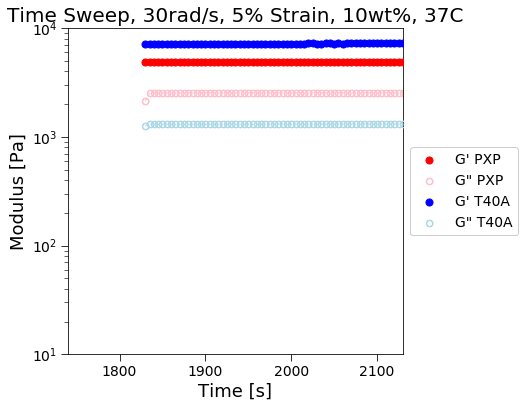

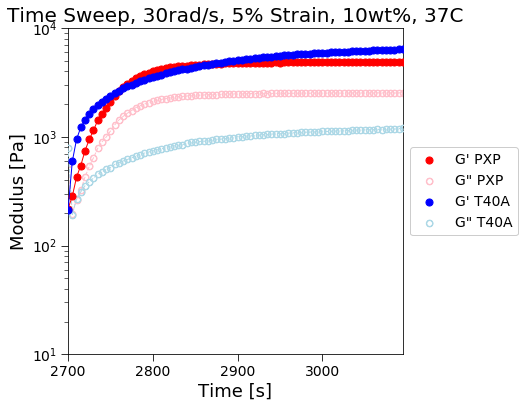

In [7]:
for i, t, s in zip(intervals, titles, sizes):
    df1 = pxp_37c_avg[i]
    df2 = txt_37c_avg[i]
    
    rh.graph_modulus_comparison(df1, x, y1, y2, y1legend_df1, y2legend_df1, ylabel, xlabel, xscale, t, s, l, df2, y1legend_df2, y2legend_df2)

## Graph: Cyclic Strain Sweeps

In [8]:
df1 = pxp_37c_avg[5]
df2 = txt_37c_avg[5]
title_5 = 'Cyclic Strain Sweep, 30rad/s, 10wt%, 37C'

xlabel = 'Time [min]'

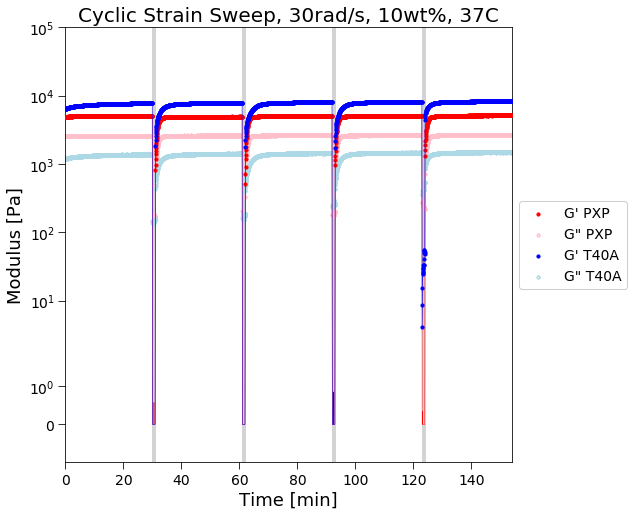

In [10]:
rh.graph_recovery_comparison(df1, x, y1, y2, y1legend_df1, y2legend_df1, ylabel, xlabel, xscale, title_5, s=10, df2=df2, y1legend_df2=y1legend_df2, y2legend_df2=y2legend_df2)

## Graph: Cyclic Strain Sweeps

In [11]:
df1 = pxp_37c_avg[7]
df2 = txt_37c_avg[7]
title_5 = 'Cyclic Strain Sweep, 30rad/s, 10wt%, 37C'

xlabel = 'Time [min]'

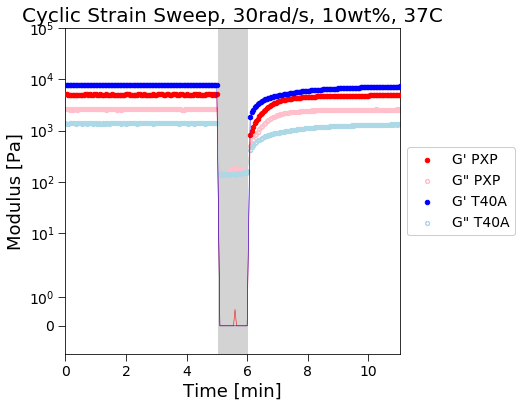

In [12]:
rh.graph_recovery_comparison(df1, x, y1, y2, y1legend_df1, y2legend_df1, ylabel, xlabel, xscale, title_5, s=20, df2=df2, y1legend_df2=y1legend_df2, y2legend_df2=y2legend_df2, zoom=True)

## Graph: Angular Frequency Sweep

In [13]:
x = 'Angular Frequency'
xlabel = 'Angular Frequency [rad/s]'
xscale = 'log'
title = 'Frequency Sweep, 5% Strain, 10wt%, 37C'

df1 = pxp_37c_avg[1]
df2 = txt_37c_avg[1]

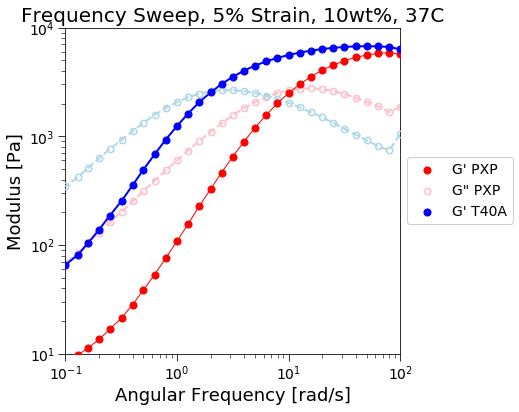

In [14]:
rh.graph_modulus_comparison(df1, x, y1, y2, y1legend_df1, y2legend_df1, ylabel, xlabel, xscale, title, 50, 2, 
                            df2, y1legend_df2) 

## Graph: Strain Sweep

In [15]:
x = 'Strain'
xscale = 'log'
xlabel = 'Strain [%]'
title = 'Strain Sweep, 30rad/s, 10wt%, 37C'

df1 = pxp_37c_avg[3]
df2 = txt_37c_avg[3]

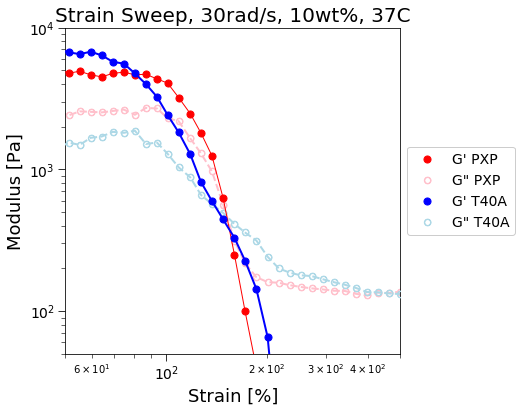

In [18]:
rh.graph_modulus_comparison(df1, x, y1, y2, y1legend_df1, y2legend_df1, ylabel, xlabel, xscale, title, 50, 2, 
                            df2, y1legend_df2, y2legend_df2, ss=True)

## Graph: Shear-Thinning

In [19]:
x = 'Shear Rate'
y1 = 'Viscosity'
ylabel = 'Viscosity [Pa*s]'""
xlabel = 'Shear Rate [1/s]'
xscale = 'Linear'
title = 'Shear Thinning, 10wt%, 37C'

y1legend_df1 = "\u03B7 PXP"
y1legend_df2 = "\u03B7 T40A"

df1 = pxp_37c_avg[6]
df2 = txt_37c_avg[6]

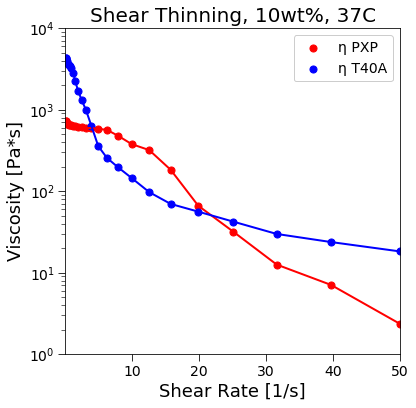

In [20]:
rh.graph_viscosity_comparison(df1, x, y1, y1legend_df1, ylabel, xlabel, xscale, title, df2, y1legend_df2)